<a href="https://colab.research.google.com/github/veronica1908/RH_Entrega1/blob/main/3_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Carga de paquetes y librerías**

In [45]:
%pip install xgboost
!pip install import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00


In [87]:
##Librerías

import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas
%matplotlib inline

## **Carga o conexión de datos**

In [54]:
#Llamamos la base de datos procesada
df_completo=pd.read_csv("https://raw.githubusercontent.com/veronica1908/RH_Entrega1/main/dfdataN.csv")
df_completo.head()

#Llamamos las funciones desde el archivo en git hub
url = 'https://github.com/veronica1908/RH_Entrega1/blob/3047534b7fe1e2e60a6c137aa762b24863277b93/funciones.ipynb'
!wget $url

--2024-03-04 20:55:22--  https://github.com/veronica1908/RH_Entrega1/blob/3047534b7fe1e2e60a6c137aa762b24863277b93/funciones.ipynb
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10808 (11K) [text/plain]
Saving to: ‘funciones.ipynb’

funciones.ipynb     100%[===================>]  10.55K  --.-KB/s    in 0.002s  

2024-03-04 20:55:22 (6.82 MB/s) - ‘funciones.ipynb’ saved [10808/10808]



In [4]:
print(df_completo.info())
#df_completo.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   float64
 1   BusinessTravel           4300 non-null   object 
 2   Department               4300 non-null   object 
 3   DistanceFromHome         4300 non-null   float64
 4   Education                4300 non-null   int64  
 5   EducationField           4300 non-null   object 
 6   EmployeeCount            4300 non-null   int64  
 7   EmployeeID               4300 non-null   int64  
 8   Gender                   4300 non-null   object 
 9   JobLevel                 4300 non-null   int64  
 10  JobRole                  4300 non-null   object 
 11  MaritalStatus            4300 non-null   object 
 12  MonthlyIncome            4300 non-null   float64
 13  NumCompaniesWorked       4300 non-null   float64
 14  Over18                  

#Métricas

In [57]:
#metricas iniciales
print("Enviroent Satisfaccion mean: ",df_completo.EnvironmentSatisfaction.mean())
print("Job Satisfaccion mean: ",df_completo.JobSatisfaction.mean())

Enviroent Satisfaccion mean:  2.723953488372093
Job Satisfaccion mean:  2.7248837209302326


In [58]:
#se corrigen datos int64 que pasan a categoricas y se elimina Employee ID.
df_completo=df_completo.astype({"JobInvolvement":object,"EmployeeCount":object,"StandardHours":object,"PerformanceRating":object,"EnvironmentSatisfaction":object,"JobSatisfaction":object,"WorkLifeBalance":object,"TrainingTimesLastYear":object,"StockOptionLevel":object,"JobLevel":object,"Education":object })
X=df_completo.drop(["EmployeeID"],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   float64
 1   BusinessTravel           4300 non-null   object 
 2   Department               4300 non-null   object 
 3   DistanceFromHome         4300 non-null   float64
 4   Education                4300 non-null   object 
 5   EducationField           4300 non-null   object 
 6   EmployeeCount            4300 non-null   object 
 7   Gender                   4300 non-null   object 
 8   JobLevel                 4300 non-null   object 
 9   JobRole                  4300 non-null   object 
 10  MaritalStatus            4300 non-null   object 
 11  MonthlyIncome            4300 non-null   float64
 12  NumCompaniesWorked       4300 non-null   float64
 13  Over18                   4300 non-null   object 
 14  PercentSalaryHike       

In [59]:
##Exportar base de datos completa
df_completo.to_csv("df_completa.csv")

In [60]:
#Separar variable objetivo Attrition y sacarla de la base principal
y = pd.DataFrame(X['Attrition']) # Variable Objetivo
X.drop(['Attrition'], axis = 1, inplace = True)
y.head()

,Attrition
0,NaN
1,Yes
2,NaN
3,NaN
4,NaN


In [61]:
# LabelEncoder del target
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y, columns = ['Attrition'])
print(y.value_counts(), y.shape)

Attrition
1            3605
0             695
dtype: int64 (4300, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [62]:
#separar variables categoricas y codificarlas para que queden como 0 y 1 y no T/F
X_object_t=pd.get_dummies(X.select_dtypes(include=['object']))
X_object_t = X_object_t.astype(int)

<ipython-input-62-00440d14d5b3>:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-62-00440d14d5b3>:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-62-00440d14d5b3>:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-62-00440d14d5b3>:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-62-00440d14d5b3>:2: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-62-00440d14d5b3>:2: FutureWarning:

In a future ve

In [63]:
#Separar variables numericas float
X_float=X.select_dtypes(include=['float'])

In [64]:
#se crea base de datos de X_ final
X_final=pd.concat([X_float,X_object_t],axis=1)
X_final.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EmployeeCount_1,Gender_Female,Gender_Male,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,StandardHours_8,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_0.0,TrainingTimesLastYear_1.0,TrainingTimesLastYear_2.0,TrainingTimesLastYear_3.0,TrainingTimesLastYear_4.0,TrainingTimesLastYear_5.0,TrainingTimesLastYear_6.0,InfoDate_2016-12-31,EnvironmentSatisfaction_1.0,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,WorkLifeBalance_1.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0,DateSurvey_2016-12-31,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_3,PerformanceRating_4,SurveyDate_2016-12-31,retirementDate_2015-01-03,retirementDate_2015-01-15,retirementDate_2015-01-26,retirementDate_2015-01-27,retirementDate_2015-01-31,retirementDate_2015-02-05,retirementDate_2015-02-07,retirementDate_2015-02-08,retirementDate_2015-02-09,retirementDate_2015-02-23,retirementDate_2015-02-26,retirementDate_2015-02-28,retirementDate_2015-03-18,retirementDate_2015-03-29,retirementDate_2015-04-07,retirementDate_2015-04-15,retirementDate_2015-04-18,retirementDate_2015-04-25,retirementDate_2015-05-04,retirementDate_2015-05-09,retirementDate_2015-05-11,retirementDate_2015-05-14,retirementDate_2015-05-19,retirementDate_2015-05-24,retirementDate_2015-05-27,retirementDate_2015-06-01,retirementDate_2015-06-08,retirementDate_2015-06-19,retirementDate_2015-06-22,retirementDate_2015-06-26,retirementDate_2015-06-27,retirementDate_2015-06-28,retirementDate_2015-07-06,retirementDate_2015-07-14,retirementDate_2015-07-16,retirementDate_2015-07-24,retirementDate_2015-08-04,retirementDate_2015-08-07,retirementDate_2015-08-11,retirementDate_2015-08-21,retirementDate_2015-09-05,retirementDate_2015-09-07,retirementDate_2015-09-16,retirementDate_2015-09-17,retirementDate_2015-09-27,retirementDate_2015-09-28,retirementDate_2015-09-30,retirementDate_2015-10-02,retirementDate_2015-10-10,retirementDate_2015-10-17,retirementDate_2015-10-19,retirementDate_2015-10-21,retirementDate_2015-10-22,retirementDate_2015-10-24,retirementDate_2015-10-28,retirementDate_2015-11-13,retirementDate_2015-11-15,retirementDate_2015-11-19,retirementDate_2015-11-22,retirementDate_2015-12-10,retirementDate_2016-01-02,retirementDate_2016-01-03,retirementDate_2016-01-04,retirementDate_2016-01-05,retirementDate_2016-01-06,retirementDate_2016-01-07,retirementDate_2016-01-08,retirementDate_2016-01-10,retirementDate_2016-01-11,retirementDate_2016-01-13,retirementDate_2016-01-14,retirementDate_2016-01-15,retirementDate_2016-01-16,retirementDate_2016-01-17,retirementDate_2016-01-18,retirementDate_2016-01-19,retirementDate_2016-01-21,retirementDate_2016-01-22,retirementDate_2016-01-23,retirementDate_2016-01-24,retirementDate_2016-01-25,retirementDate_2016-01-26,retirementDate_2016-01-27,retirementDate_2016-01-28,retirementDate_2016-01-29,retirementDate_2016-01-30,retirementDate_2016-01-31,retirementDate_2016-02-01,retirementDate_2016-02-02,retirementDate_20

In [65]:
#Verificamos dimensiones
X_final.shape

(4300, 442)

#Método alternativo escogiendo modelos según importancia de variables en los modelos

In [66]:
#mide las métricas de los modelos

def medir_modelos(modelos,scoring,X,y,cv):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)

    metric_modelos.columns=["ran_forest","decision_tree","reg_lineal","gradient_boosting"]
    return metric_modelos

In [67]:
#Nombre de caracteristicas númericas
numeric_columns=list(X_final.select_dtypes('float64').columns)
#Estandarización de variables
#pipeline=ColumnTransformer([( "std_numericas",StandardScaler() ,numeric_columns)], remainder='passthrough')

#X_trans = pipeline.fit_transform(X_final)
#X_trans_db=pd.DataFrame(X_trans,columns=X_final.columns)


scaler=StandardScaler() #se selecciona el escalado o estandarizacion de variables
scaler.fit(X_final) # se ajusta a la base
X_trans=scaler.transform(X_final)#se aplica a la base
X_trans_db=pd.DataFrame(X_trans,columns=X_final.columns) #se vuelve a convertir en df pandas

In [68]:
# se nombran los modelos con hiperparametros por defecto para compararlos y ya despues se afinan solo los hiperparametros del mejor
m_ranfor=RandomForestClassifier()
m_dtree=tree.DecisionTreeClassifier()
m_lreg = linear_model.LinearRegression()
m_gbr = XGBRegressor()

##Selección de variables

In [69]:
def sel_variables(modelos,X,y,threshold): #función selección de variables

    var_names_ac=np.array([])
    for modelo in modelos:
        #modelo=modelos[i]
        modelo.fit(X,y)
        sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
        var_names= sel.get_feature_names_out(modelo.feature_names_in_)
        var_names_ac=np.append(var_names_ac, var_names)
        var_names_ac=np.unique(var_names_ac)

    return var_names_ac

In [70]:
#lista con los modelos para funcion sel_variables
modelos=list([m_ranfor,m_dtree, m_lreg, m_gbr])

#se usa funcion sel_variables para comparar los desempeños de los modelos
var_names=sel_variables(modelos,X_final,y,threshold="1.5*mean")# threshold selecciona los limites de seleccion de importancia de variables, en este caso selecciona la variables que sean dos veces el promedio
var_names.shape

<ipython-input-69-f686390f60bf>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(18,)

In [71]:
# Llamada a la función
var_names = sel_variables(modelos, X_final, y, threshold="1.5*mean")

<ipython-input-69-f686390f60bf>:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [72]:
#matriz con variables seleccionadas
X_sel=X_final[var_names]
X_sel

,Age,BusinessTravel_Travel_Frequently,DistanceFromHome,EnvironmentSatisfaction_1.0,JobSatisfaction_1.0,JobSatisfaction_4.0,MaritalStatus_Single,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,resignationReason_Others,resignationReason_Salary,resignationReason_Stress,retirementType_Fired,retirementType_Resignation
0,51.0,0,6.0,0,0,1,0,131160.0,1.0,11.0,1.0,1.0,0.0,0.0,1,0,0,0,0
1,31.0,1,10.0,0,0,0,1,41890.0,0.0,23.0,6.0,5.0,1.0,4.0,1,0,0,0,1
2,32.0,1,17.0,0,0,0,0,193280.0,1.0,15.0,5.0,5.0,0.0,3.0,1,0,0,0,0
3,38.0,0,2.0,0,0,1,0,83210.0,3.0,11.0,13.0,8.0,7.0,5.0,1,0,0,0,0
4,32.0,0,10.0,0,1,0,1,23420.0,4.0,12.0,9.0,6.0,0.0,4.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,29.0,0,4.0,0,0,1,1,35390.0,1.0,18.0,6.0,6.0,1.0,5.0,1,0,0,0,0
4296,42.0,0,5.0,0,1,0,1,60290.0,3.0,17.0,10.0,3.0,0.0,2.0,1,0,0,0,0
4297,29.0,0,2.0,0,0,1,0,26790.0,2.0,15.0,10.0,3.0,0.0,2.0,1,0,0,0,0
4298,25.0,0,25.0,1,0,0,0,37020.0,0.0,20.0,5.0,4.0,1.0,2.0,1,0,0,0,0


##Selección de modelo

In [73]:
#Ya se seleccionaron la variables, ahora se selecciona el mejor modelo, sacando el rmse de cada modelo
#se prueba con la base completa y con la variables seleccionadas
def medir_modelos(modelos,scoring,X,y,cv):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)

    metric_modelos.columns=["ran_forest","decision_tree","reg_lineal","gradient_boosting"]
    return metric_modelos


In [88]:
rmse_X_final=medir_modelos(modelos,"neg_root_mean_squared_error",X_final,y,10) ## base con todas las variables
rmse_X_sel=medir_modelos(modelos,"neg_root_mean_squared_error",X_sel,y,10) ### base con variables seleccionadas

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packa

rf       -4.822428e-03
dt        0.000000e+00
rl       -1.186963e-03
gb       -1.832113e-05
rf_Sel    0.000000e+00
dt_sel    0.000000e+00
rl_sel   -6.040820e-15
gb_Sel   -1.832113e-05
dtype: float64

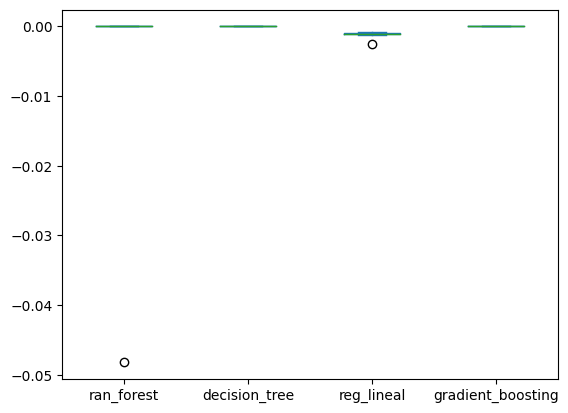

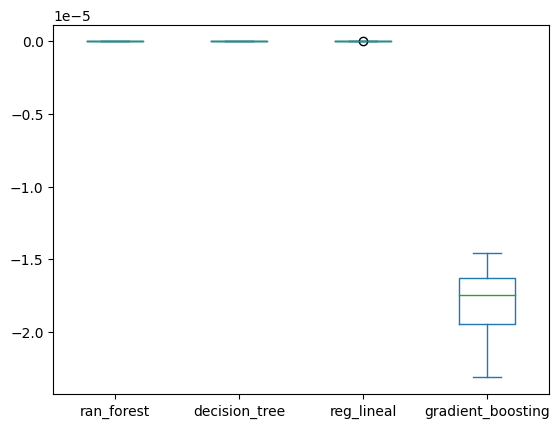

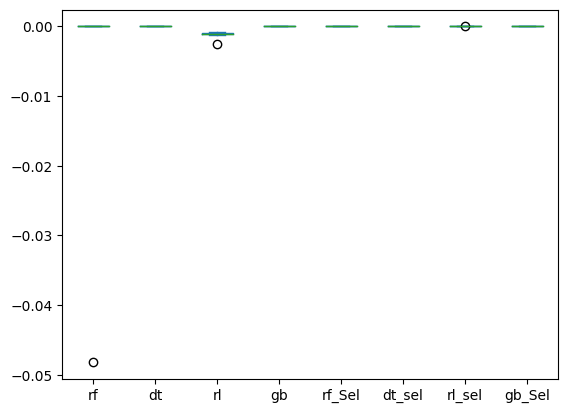

In [89]:
rmse=pd.concat([rmse_X_final,rmse_X_sel],axis=1)
rmse.columns=['rf', 'dt', 'rl', 'gb',
       'rf_Sel', 'dt_sel', 'rl_sel', 'gb_Sel']

rmse_X_final.plot(kind='box') #### gráfico para modelos todas las varibles
rmse_X_sel.plot(kind='box') ### gráfico para modelo variables seleccionadas
rmse.plot(kind='box') ### gráfico para modelos sel y todas las variables

rmse.mean() ### medias de mape

por la interpretacion de las graficas se podria decir que el mejor modelo es el random forest ale se les afinarian hiperparametro

#Modelos

In [22]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=1)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

#Nombre de caracteristicas númericas
numeric_columns=list(X_final.select_dtypes('float64').columns)

#Estandarización de variables
pipeline=ColumnTransformer([( "std_numericas",StandardScaler() , numeric_columns)], remainder='passthrough')

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)# no se hace fit de nuevo(escalar de nuevo) con los datos de test, solo los de train

Tamaño del conjunto de entrenamiento. X:  (3440, 442)  Y:  (3440, 1)
Tamaño del conjunto de validación. X:  (860, 442)  Y:  (860, 1)


Al ser un ejercicio de clasificacion, se evaluaran 3 modelos los cuales son adecuados para clasificar y lo mas importante, nos permiten saber el peso que tienen las variables en la respuesta

##Random Forest Classifier

In [75]:
##Random Forest Classifier-Hiperparametros
# Definición de cuadricula de hiperparametros
parameters = {'max_depth': [5,10,15],
              'max_features': [5,7,8],
              'min_samples_split': [7,10],
              'criterion': ['gini', 'entropy'],
              'n_estimators': [300,500,800]}
#modelo estimador
ranfor = RandomForestClassifier(random_state = 1)

#Definir hiperparametros por  busqueda aleatoria
rand_s = RandomizedSearchCV(estimator=ranfor, param_distributions=parameters, n_iter=10, scoring='accuracy', cv=5, verbose=False)

rand_s.fit(X_train, y_train)

print('Best Params: ', rand_s.best_params_)
print('Best Score: ', rand_s.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.10/dist-packa

Best Params:  {'n_estimators': 300, 'min_samples_split': 7, 'max_features': 8, 'max_depth': 15, 'criterion': 'gini'}
Best Score:  0.9133720930232558


In [76]:
##Random Forest Classifier-Modelo
#Train del modelo
random_forest = RandomForestClassifier(
            n_estimators = 500,
            criterion = 'entropy',
            max_depth = 15,
            min_samples_split = 10,
            max_features = 7,
            # oob_score = False,
            n_jobs = -1,
            # random_state = 1
            # max_leaf_nodes = 10,
         )
random_forest.fit(X_train, y_train)

<ipython-input-76-0e82180ebe41>:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(criterion='entropy', max_depth=15, max_features=7,
                       min_samples_split=10, n_estimators=500, n_jobs=-1)

In [77]:
##Random Forest Classifier-Modelo
#Metricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, random_forest.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, random_forest.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, random_forest.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, random_forest.predict(X_test)))

Train - Accuracy : 0.9247093023255814
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      0.54      0.70       565
           1       0.92      1.00      0.96      2875

    accuracy                           0.92      3440
   macro avg       0.96      0.77      0.83      3440
weighted avg       0.93      0.92      0.92      3440

Test - Accuracy : 0.9244186046511628
Test - classification report :               precision    recall  f1-score   support

           0       1.00      0.50      0.67       130
           1       0.92      1.00      0.96       730

    accuracy                           0.92       860
   macro avg       0.96      0.75      0.81       860
weighted avg       0.93      0.92      0.91       860



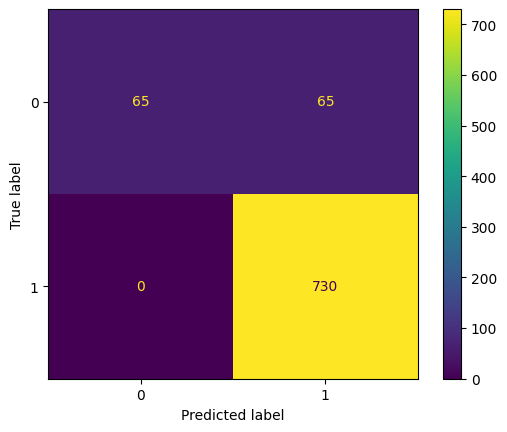

In [78]:
##Random Forest Classifier-Modelo
#Matriz de confusion
cm1= confusion_matrix(y_test, random_forest.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [79]:
###Random Forest Classifier-Modelo
#Importancia de las variables
columnas=pd.DataFrame(X_final.columns).rename(columns={0:'columnas'})
importancia=pd.DataFrame(random_forest.feature_importances_).rename(columns={0:'importancia'})
random_forest_var=pd.concat([columnas,importancia], axis=1).sort_values('importancia',ascending=False).head(7)
print(random_forest_var)

                       columnas  importancia
438  retirementType_Resignation     0.238198
439    resignationReason_Others     0.099435
440    resignationReason_Salary     0.065026
441    resignationReason_Stress     0.044835
437        retirementType_Fired     0.037257
5             TotalWorkingYears     0.030488
6                YearsAtCompany     0.029236


In [80]:
fig = px.bar(random_forest_var, x='columnas', y='importancia', color = 'columnas',  title ='<b>Importancia de los factores que analiza el modelo<b>')
fig.update_layout(
    xaxis_title = 'Importancia de los factores',
    yaxis_title = 'Factores',
    template = 'plotly_white',
    title_x = 0.5,
    showlegend=False)

##Decision Tree Classifier

In [81]:
##Decision Tree Classifier-Hiperparametros
# Definición de cuadricula de hiperparametros
parameters = {'max_depth': [2,10,20],# Maxima profundidad
              'max_features': [3,7,14],# Maximo de caracteristicas a usar
              'max_leaf_nodes': [9,14,15,16,20],#Maximo de nodos
              'min_samples_leaf': [3,4,5,7,10,12],#Minimo de muestras para los nodos hoja
              'criterion': ['gini', 'entropy'],#Medir la cantidad de división.
              'splitter': ['best']}#Estrategia para dividir cada nodo
#modelo estimador
detri = tree.DecisionTreeClassifier(random_state=1)

#Definir hiperparametros por  busqueda aleatoria
rand_s = RandomizedSearchCV(estimator=detri, param_distributions=parameters, n_iter=10, scoring='accuracy', cv=5, verbose=False)
rand_s.fit(X_train, y_train)

print('Best Params: ', rand_s.best_params_)
print('Best Score: ', rand_s.best_score_)

#Definir hiperparametros por  cuadricula

grid_search = GridSearchCV(detri, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

print('Best Params Grid: ', grid_result.best_params_)
print('Best Score Grid: ', grid_result.best_score_)

Best Params:  {'splitter': 'best', 'min_samples_leaf': 3, 'max_leaf_nodes': 9, 'max_features': 14, 'max_depth': 20, 'criterion': 'entropy'}
Best Score:  0.8790697674418604
Best Params Grid:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 14, 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'splitter': 'best'}
Best Score Grid:  0.8956395348837208


In [82]:
##Decision Tree Classifier-Modelo
#Train del modelo
clf = tree.DecisionTreeClassifier(
          criterion = 'gini',
          max_depth = 10,
          max_features = 14,
          max_leaf_nodes = 20,
          min_samples_leaf = 5,
          splitter = 'best',
          random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=14, max_leaf_nodes=20,
                       min_samples_leaf=5, random_state=0)

In [83]:

##Decision Tree Classifier-Modelo
#Metricas de desempeño
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))

Train - Accuracy : 0.8386627906976745
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.03       565
           1       0.84      1.00      0.91      2875

    accuracy                           0.84      3440
   macro avg       0.92      0.51      0.47      3440
weighted avg       0.86      0.84      0.77      3440

Test - Accuracy : 0.85
Test - classification report :               precision    recall  f1-score   support

           0       1.00      0.01      0.02       130
           1       0.85      1.00      0.92       730

    accuracy                           0.85       860
   macro avg       0.92      0.50      0.47       860
weighted avg       0.87      0.85      0.78       860



Profundidad del árbol: 2
Número de nodos terminales: 3


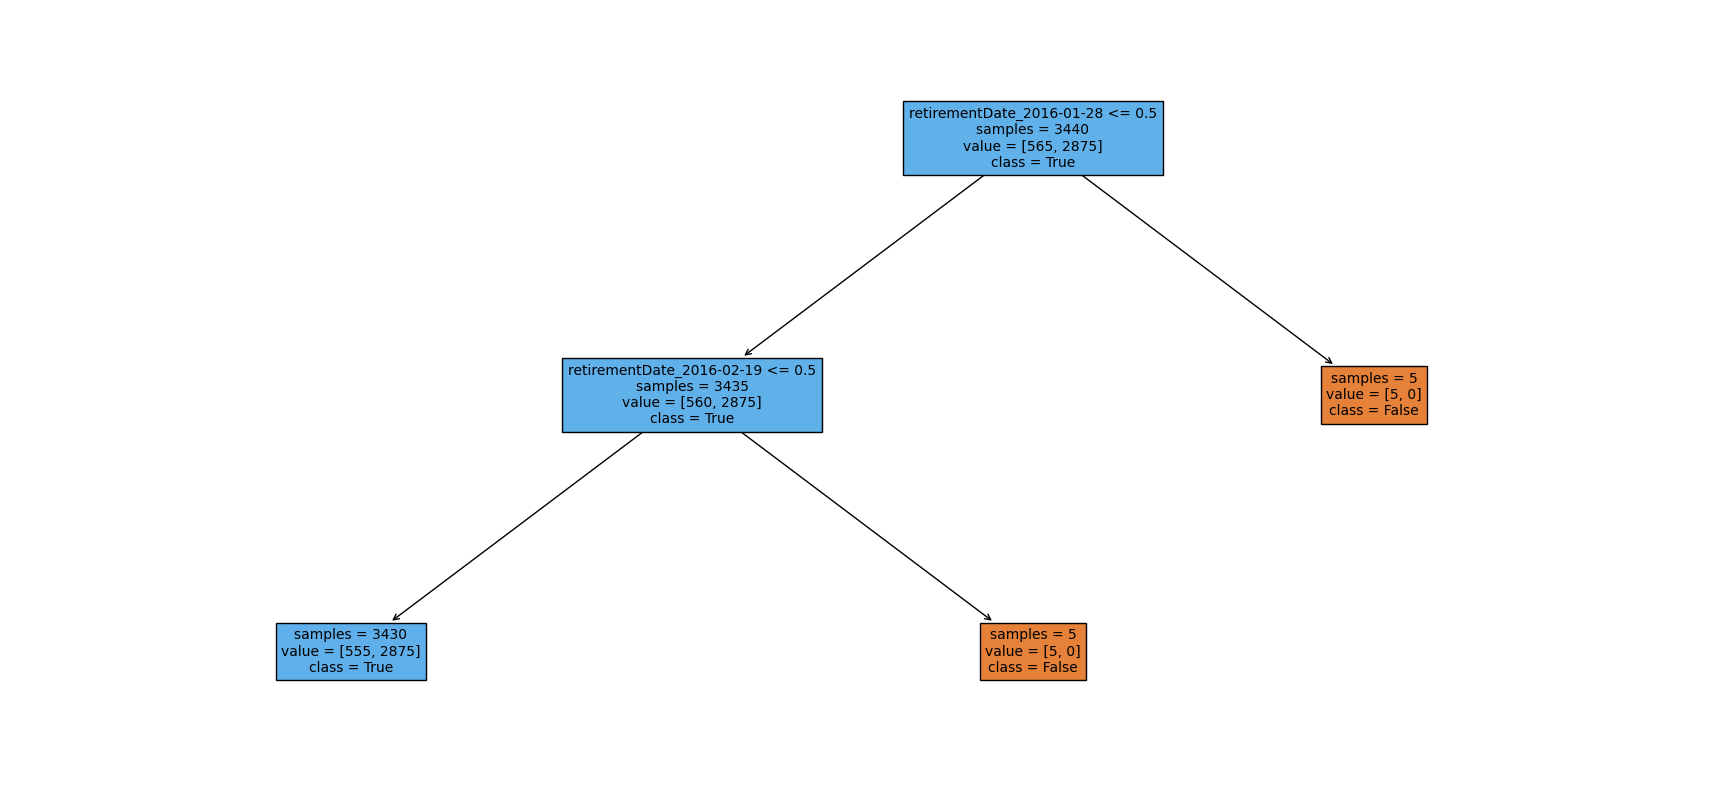

In [84]:
##Decision Tree Classifier-Arbol
fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = X_final.columns,
            class_names   = ['False', 'True'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
        )

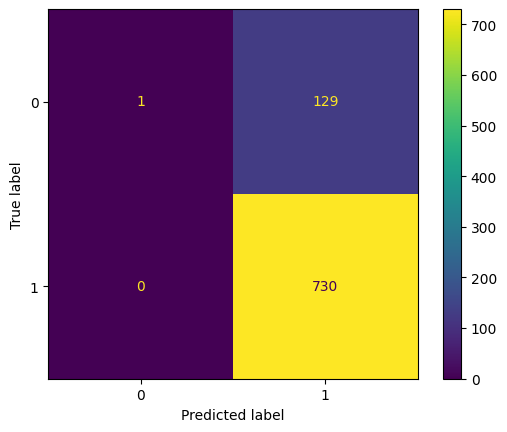

In [85]:
##decision Tree Classifier-Modelo
#Matriz de confusion
cm1= confusion_matrix(y_test, clf.predict(X_test))
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1)
cm1_display.plot()
plt.show()

In [86]:
###decision Tree Classifier-Modelo
#Importancia de las variables
importancia=pd.DataFrame(clf.feature_importances_).rename(columns={0:'importancia'})
cf=pd.concat([columnas,importancia], axis=1).sort_values('importancia',ascending=False).head(7)
print(cf)

                      columnas  importancia
184  retirementDate_2016-02-19     0.500728
163  retirementDate_2016-01-28     0.499272
0                          Age     0.000000
291  retirementDate_2016-06-24     0.000000
301  retirementDate_2016-07-05     0.000000
300  retirementDate_2016-07-04     0.000000
299  retirementDate_2016-07-03     0.000000
